In [16]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [2]:
dir_csv = "./base_manusis/original/"
table = "maint_order"

data = pd.read_csv(dir_csv+table+".csv",low_memory=False)

In [7]:
list(data.columns)

['id',
 'order_number',
 'company_id',
 'area_id',
 'first_loc_id',
 'second_loc_id',
 'asset_id',
 'asset_part_id',
 'asset_part_child_id',
 'asset_group_id',
 'cost_center_id',
 'maint_req_id',
 'maint_service_type_id',
 'maint_service_nature_id',
 'employee_team_id',
 'employee_id',
 'description',
 'executed_service',
 'maint_failure_id',
 'maint_cause_id',
 'maint_action_id',
 'maint_order_status_id',
 'priority',
 'cancel_reason',
 'cancel_user_id',
 'created_at',
 'updated_at',
 'deleted_at',
 'is_sistematic',
 'maint_started_at',
 'maint_finished_at',
 'closed_at',
 'opened_at',
 'downtime_started_at',
 'downtime_finished_at',
 'cancelled_at',
 'origin_doc',
 'scheduled_to',
 'est_finish_at',
 'prog_year_week_number',
 'is_executed',
 'executed_date',
 'maint_planning_id',
 'logged_user_id',
 'maint_order_cancel_reason_id',
 'parent_maint_order_id',
 'maint_plan_id',
 'is_failure_analysis',
 'is_perform_failure_analysis',
 'maint_possible_cause_id',
 'result_failure_analysis',


In [4]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [11]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [13]:
# confusion_matrix = pd.crosstab(data["priority"], data["area_id"]).as_matrix()
cramers_v(data["priority"], data["area_id"])

0.3095733597329598

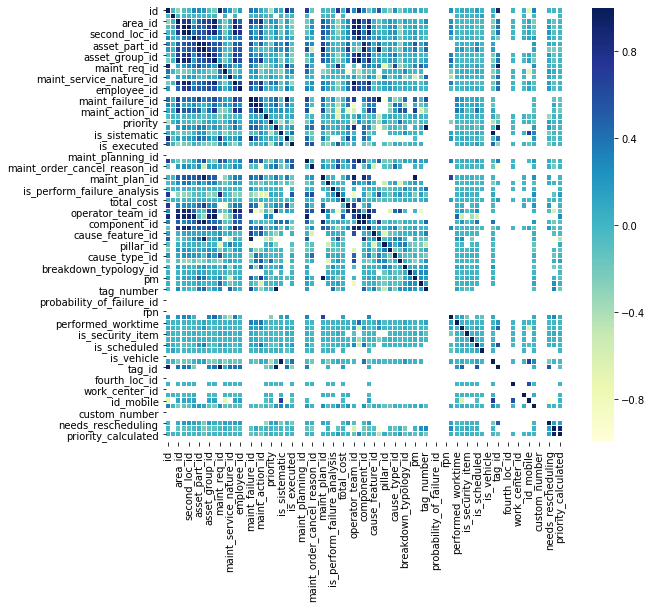

In [17]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

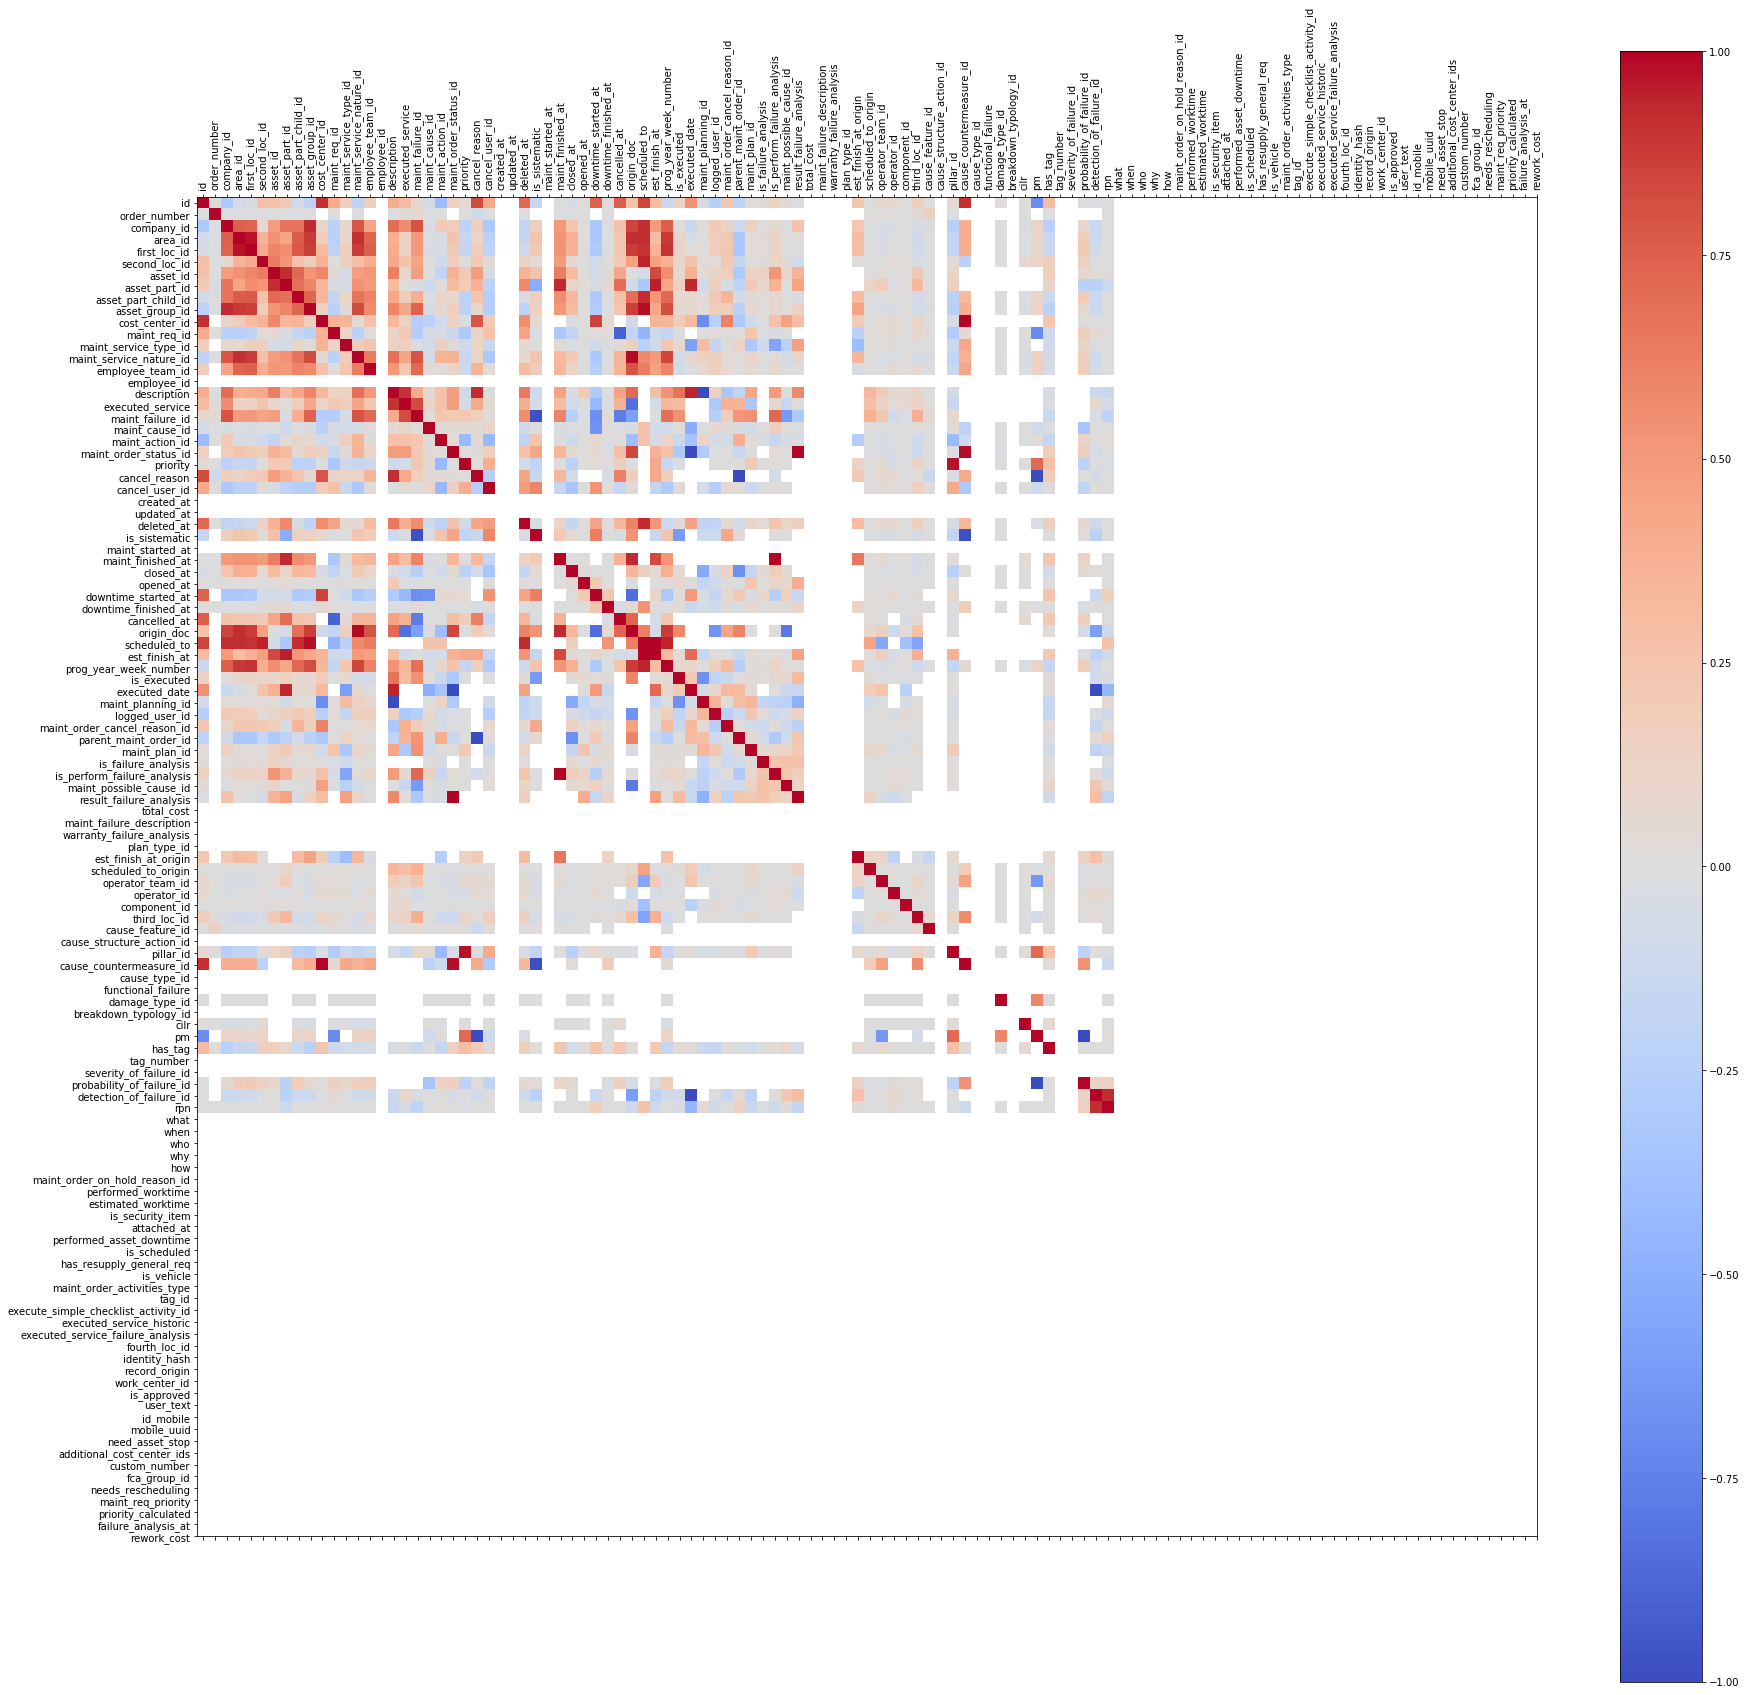

In [20]:
corr = data.corr()
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()